<a href="https://colab.research.google.com/github/gurung-ajay/Satellite-Image-Classification-with-CNN/blob/main/Satellite_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satellite Image Classification with Convolutional Neural Network

This dataset contains images of photos taken from the satellite. These images are of four classes:
* cloudy
* desert
* green area
* water

dataset link: https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification/data

I have made an image classification model for these images using Convolutional Neural Network and evaluated its performance.

Tools used: Tensorflow, Matplotlib and OpenCV

In [ ]:
!gdown https://drive.google.com/uc?id=12qu5ygejSrXvkAPi6MxepJL5YLnRWTOP&export=download

Downloading...
From: https://drive.google.com/uc?id=12qu5ygejSrXvkAPi6MxepJL5YLnRWTOP
To: /content/satellite.zip
100% 22.8M/22.8M [00:00<00:00, 51.8MB/s]


In [ ]:
!unzip '/content/satellite.zip'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

In [ ]:
def plot_image(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()

# Example images

## Cloudy

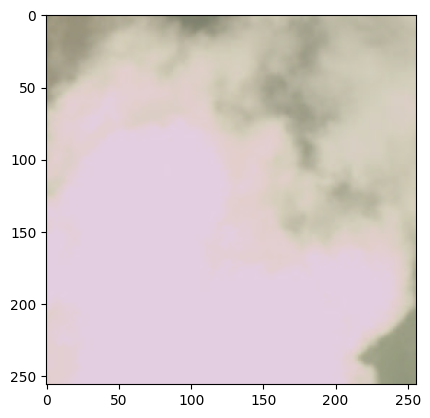

In [ ]:
plot_image('/content/data/cloudy/train_10021.jpg')

## Desert

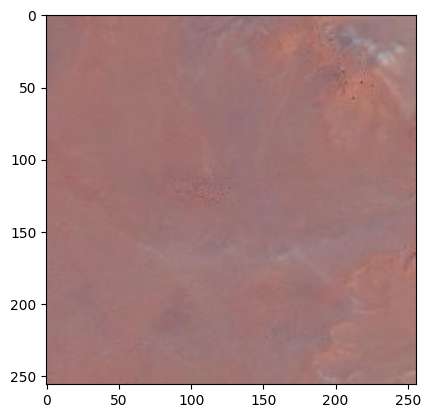

In [ ]:
plot_image('/content/data/desert/desert(1).jpg')

## Green area

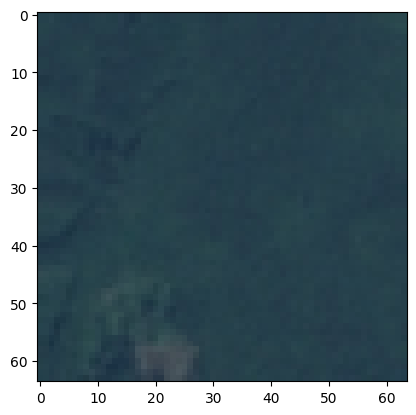

In [ ]:
plot_image('/content/data/green_area/Forest_1404.jpg')

## Water

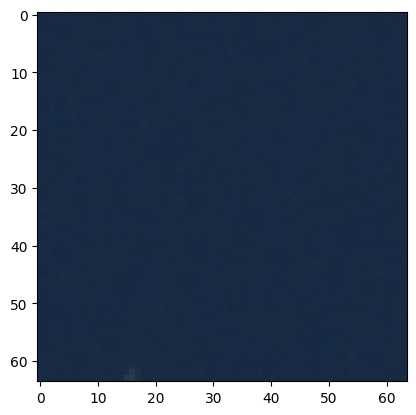

In [ ]:
plot_image('/content/data/water/SeaLake_1.jpg')

# Splitting data

In [ ]:
# main directory
directory = '/content/data'

# defining batch and image size
batch_size = 32
image_size = (256, 256)

# splitting data to train_data for training and valid_data for model evaluation
train_data = tf.keras.utils.image_dataset_from_directory(
    directory = directory,
    batch_size = batch_size,
    seed = 123,
    image_size = image_size,
    subset = 'training',
    validation_split = 0.3
)

valid_data = tf.keras.utils.image_dataset_from_directory(
    directory = directory,
    batch_size = batch_size,
    seed = 123,
    image_size = image_size,
    subset = 'validation',
    validation_split = 0.3
)

Found 5631 files belonging to 4 classes.
Using 3942 files for training.
Found 5631 files belonging to 4 classes.
Using 1689 files for validation.


# Building Model and Evaluation

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(1/255)) # scale pixel values to [0, 1]
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(256,256,3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())  # input layer
model.add(tf.keras.layers.Dense(128, activation='relu'))  # hidden layer
model.add(tf.keras.layers.Dense(4, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
history1 = model.fit(train_data, validation_data=valid_data, epochs=5)

Epoch 1/5
124/124 [==============================] - 9s 56ms/step - loss: 0.4205 - accuracy: 0.7661 - val_loss: 0.4407 - val_accuracy: 0.7963
Epoch 2/5
124/124 [==============================] - 7s 52ms/step - loss: 0.2605 - accuracy: 0.8810 - val_loss: 0.2372 - val_accuracy: 0.9070
Epoch 3/5
124/124 [==============================] - 7s 54ms/step - loss: 0.1983 - accuracy: 0.9150 - val_loss: 0.1811 - val_accuracy: 0.9230
Epoch 4/5
124/124 [==============================] - 6s 47ms/step - loss: 0.1941 - accuracy: 0.9110 - val_loss: 0.1927 - val_accuracy: 0.9142
Epoch 5/5
124/124 [==============================] - 7s 54ms/step - loss: 0.1780 - accuracy: 0.9198 - val_loss: 0.2058 - val_accuracy: 0.9011


Both training and validation data were able to get accuracy over 90%.

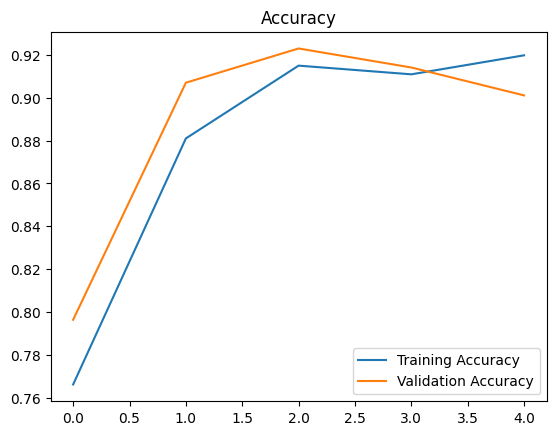

In [ ]:
plt.title('Accuracy')
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

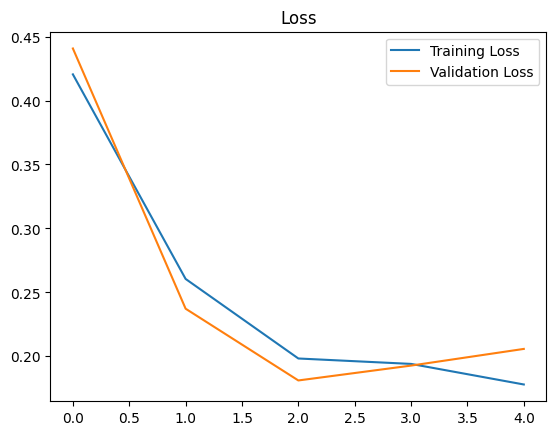

In [ ]:
plt.title('Loss')
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

The model seems to perform well on both training and validation data.